In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('sales.csv', parse_dates=['date'])


In [2]:
# -------------------------------
# Basic Overview
# -------------------------------
print("\nDataset Head:")
print(df.head())
print("\nInfo:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicates:")
print(df.duplicated().sum())



Dataset Head:
        date    store    product  sales
0 2021-01-01  Store_A  Product_X    236
1 2021-01-01  Store_A  Product_Y    105
2 2021-01-01  Store_A  Product_Z    352
3 2021-01-01  Store_B  Product_X     60
4 2021-01-01  Store_B  Product_Y    336

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9855 entries, 0 to 9854
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     9855 non-null   datetime64[ns]
 1   store    9855 non-null   object        
 2   product  9855 non-null   object        
 3   sales    9855 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 308.1+ KB

Missing Values:
date       0
store      0
product    0
sales      0
dtype: int64

Duplicates:
0



Descriptive Stats:
                      date        sales
count                 9855  9855.000000
mean   2022-07-02 00:00:00   277.054389
min    2021-01-01 00:00:00    50.000000
25%    2021-10-01 00:00:00   164.000000
50%    2022-07-02 00:00:00   278.000000
75%    2023-04-02 00:00:00   390.000000
max    2023-12-31 00:00:00   500.000000
std                    NaN   130.336716


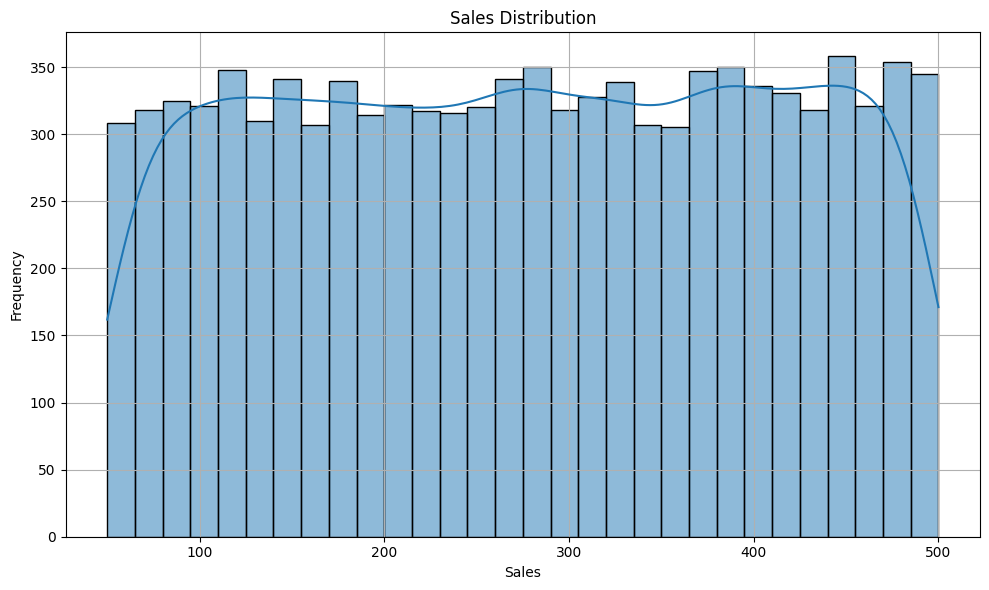

In [3]:
# -------------------------------
# Descriptive Statistics
# -------------------------------
print("\nDescriptive Stats:")
print(df.describe())

# -------------------------------
# Distribution of Sales
# -------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df['sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


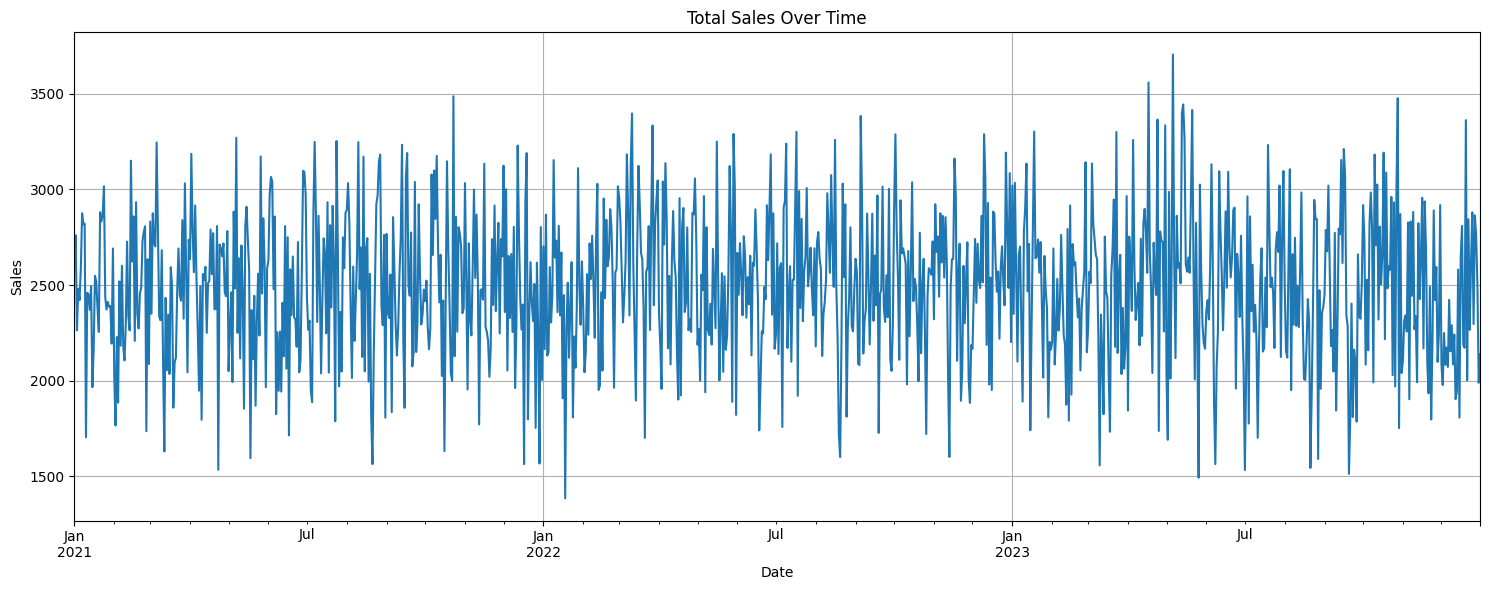

In [4]:
# -------------------------------
# Sales Over Time
# -------------------------------
df_grouped = df.groupby('date')['sales'].sum()
plt.figure(figsize=(15, 6))
df_grouped.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


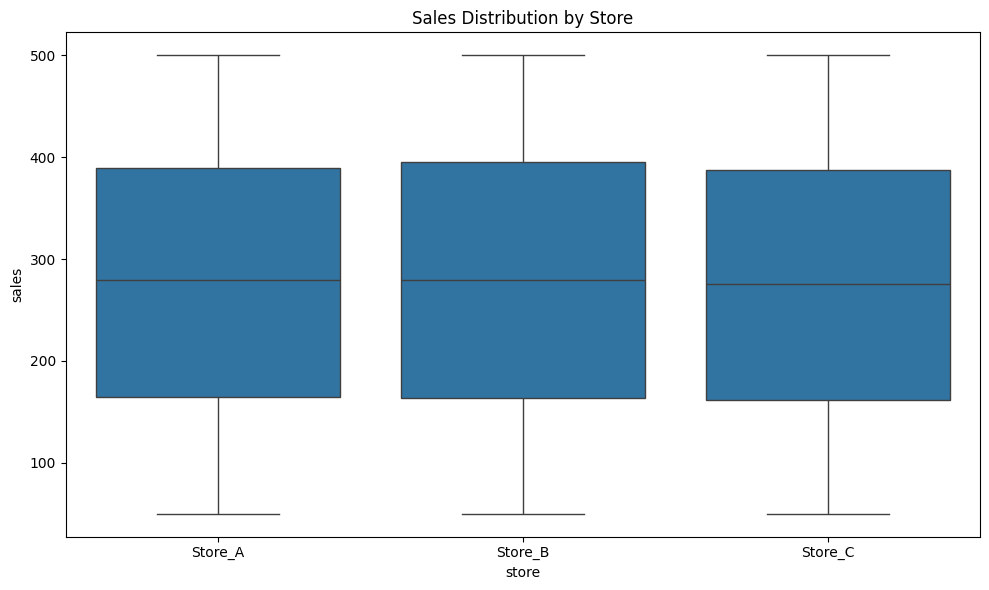

In [5]:
# -------------------------------
# Sales by Store
# -------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='store', y='sales')
plt.title('Sales Distribution by Store')
plt.tight_layout()
plt.show()


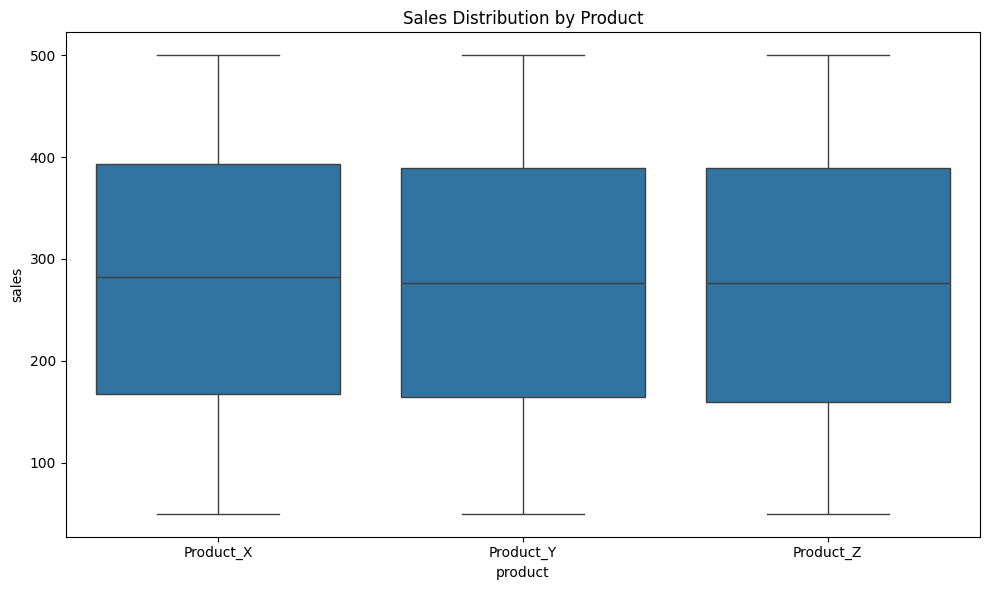

In [6]:
# -------------------------------
# Sales by Product
# -------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='product', y='sales')
plt.title('Sales Distribution by Product')
plt.tight_layout()
plt.show()


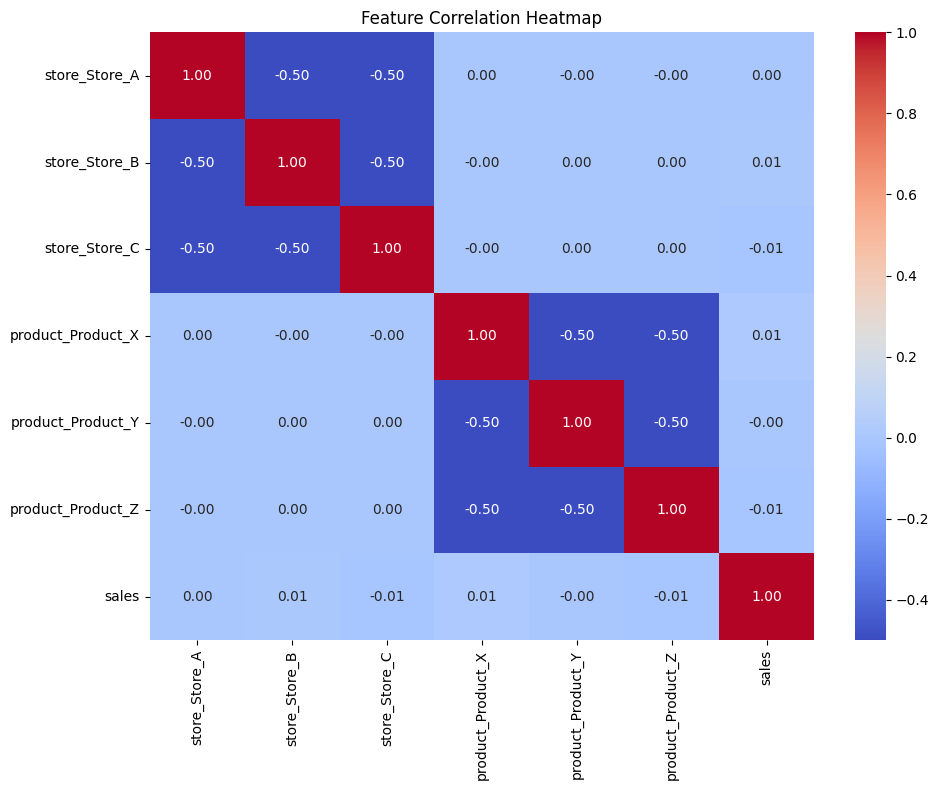

In [7]:
# -------------------------------
# Heatmap of Correlations
# -------------------------------
# Add dummy encoding for categorical fields
encoded_df = pd.get_dummies(df[['store', 'product']])
encoded_df['sales'] = df['sales']
correlation_matrix = encoded_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


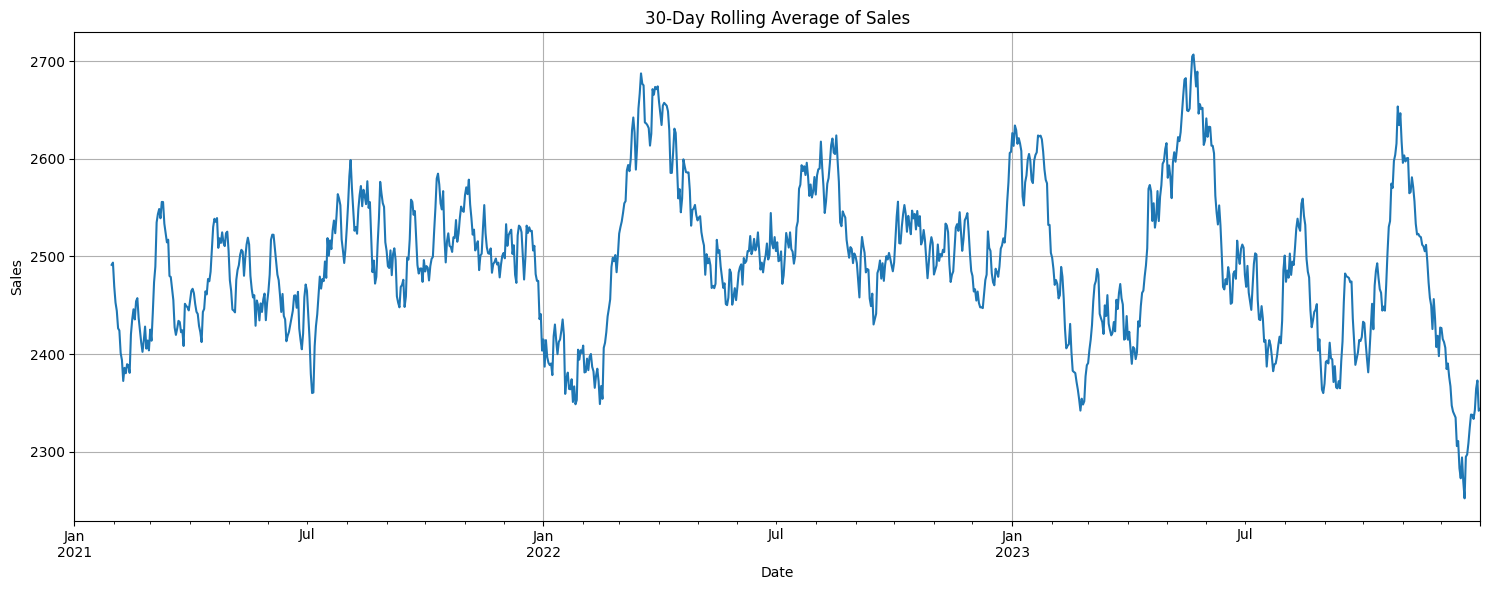


EDA completed successfully.


In [8]:
# -------------------------------
# Rolling Average
# -------------------------------
df_roll = df.groupby('date')['sales'].sum().rolling(window=30).mean()
plt.figure(figsize=(15, 6))
df_roll.plot()
plt.title('30-Day Rolling Average of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nEDA completed successfully.")